In [3]:
print("1.4.1 How can we determine the average daily social media usage time among young adults in the sample, and how does it compare to their overall screen time?Descriptive Analysis")

1.4.1 How can we determine the average daily social media usage time among young adults in the sample, and how does it compare to their overall screen time?Descriptive Analysis


In [4]:
from google.colab import files

In [5]:
uploaded = files.upload()

Saving mental_health_and_technology_usage_2022.xlsx to mental_health_and_technology_usage_2022.xlsx


In [9]:
import pandas as pd
data = pd.read_excel('mental_health_and_technology_usage_2022.xlsx')


In [10]:
data

,User_ID,Age,Birth Year,Generation,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage
0,USER-00001,23,1999,Gen Z,6.57,6.00,0.68,12.36,Good,Low,8.01,6.71,No,Negative,Yes
1,USER-00002,21,2001,Gen Z,3.01,2.57,3.74,7.61,Poor,High,7.28,5.88,Yes,Positive,No
2,USER-00003,51,1971,Gen X,3.04,6.14,1.26,3.16,Fair,High,8.04,9.81,No,Negative,No
3,USER-00004,25,1997,Gen Z,3.84,4.48,2.59,13.08,Excellent,Medium,5.62,5.28,Yes,Negative,Yes
4,USER-00005,53,1969,Gen X,1.20,0.56,0.29,12.63,Good,Low,5.55,4.00,No,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,USER-09996,42,1980,Gen X,7.05,0.41,0.53,13.90,Good,Medium,7.37,5.02,Yes,Neutral,No
9996,USER-09997,31,1991,Millennials,3.12,6.79,0.80,1.17,Fair,Medium,8.92,9.78,No,Neutral,Yes
9997,USER-09998,23,1999,Gen Z,4.38,3.98,0.52,7.81,Poor,High,7.59,2.99,No,Positive,No
9998,USER-09999,38,1984,Millennials,4.44,1.48,3.28,13.95,Poor,Medium,7.26,2.24,Yes,Neutral,Yes


In [11]:
# Define young adults as those between 18 and 35 years old
young_adults = data[(data['Age'] >= 18) & (data['Age'] <= 35)]

# Calculate the average daily social media usage and screen time for young adults
average_social_media_usage = young_adults['Social_Media_Usage_Hours'].mean()
average_screen_time = young_adults['Screen_Time_Hours'].mean()

# Print the results
print(f"Average daily social media usage among young adults: {average_social_media_usage:.2f} hours")
print(f"Average overall screen time among young adults: {average_screen_time:.2f} hours")


Average daily social media usage among young adults: 3.95 hours
Average overall screen time among young adults: 7.93 hours


In [15]:
import matplotlib.pyplot as plt
import pandas as pd

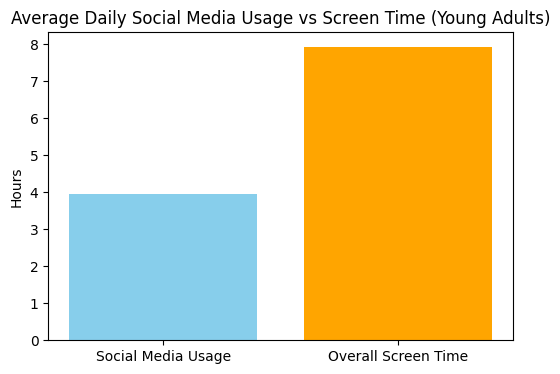

In [16]:

# Plotting the results
labels = ['Social Media Usage', 'Overall Screen Time']
averages = [average_social_media_usage, average_screen_time]

plt.figure(figsize=(6, 4))
plt.bar(labels, averages, color=['skyblue', 'orange'])
plt.title('Average Daily Social Media Usage vs Screen Time (Young Adults)')
plt.ylabel('Hours')
plt.show()

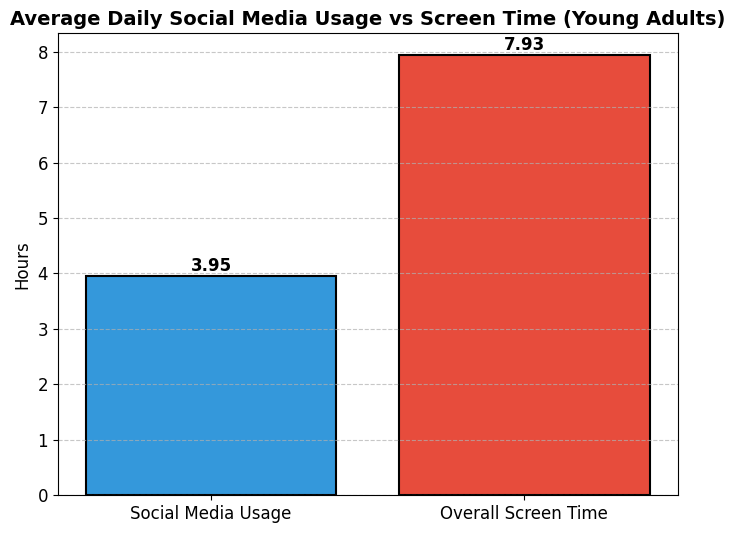

In [17]:
labels = ['Social Media Usage', 'Overall Screen Time']
averages = [average_social_media_usage, average_screen_time]

plt.figure(figsize=(8, 6))  # Larger figure size for clarity
bars = plt.bar(labels, averages, color=['#3498db', '#e74c3c'], edgecolor='black', linewidth=1.5)

# Adding values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', fontsize=12, fontweight='bold')

# Enhance the grid and axes
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Average Daily Social Media Usage vs Screen Time (Young Adults)', fontsize=14, fontweight='bold')
plt.ylabel('Hours', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the enhanced plot
plt.show()

# 1.4.6 How do technology usage patterns and stress levels vary across generations (The Silent Generation, Baby Boomers, Gen X, Millennials, Gen Z, and Gen Alpha)?
*Algorithms: Data Aggregation, Summary Statistics*



In [20]:
stress_mapping = {
    'Low': 1,
    'Medium': 2,
    'High': 3
}

# Convert 'Stress_Level' to numeric values
data['Stress_Level'] = data['Stress_Level'].map(stress_mapping)

# Check if 'Technology_Usage_Hours' contains any non-numeric values
# If so, try converting them to numeric, forcing errors to NaN
data['Technology_Usage_Hours'] = pd.to_numeric(data['Technology_Usage_Hours'], errors='coerce')

# Drop rows where either column has missing values after conversion
data_cleaned = data.dropna(subset=['Technology_Usage_Hours', 'Stress_Level'])

# Select relevant columns for analysis
relevant_columns = ['Generation', 'Technology_Usage_Hours', 'Stress_Level']
data_subset = data_cleaned[relevant_columns]

# Group by 'Generation' and calculate summary statistics (mean and standard deviation)
grouped_data = data_subset.groupby('Generation').agg(
    avg_tech_usage=('Technology_Usage_Hours', 'mean'),
    std_tech_usage=('Technology_Usage_Hours', 'std'),
    avg_stress_level=('Stress_Level', 'mean'),
    std_stress_level=('Stress_Level', 'std')
).reset_index()

# Display the summary statistics for each generation
print(grouped_data)

     Generation  avg_tech_usage  std_tech_usage  avg_stress_level  \
0  Baby Boomers        6.561423        3.149514          1.976387   
1         Gen X        6.513269        3.176346          2.013003   
2         Gen Z        6.460697        3.180053          2.024793   
3   Millennials        6.397749        3.165632          1.985779   

   std_stress_level  
0          0.815189  
1          0.818428  
2          0.817325  
3          0.813835  


In [21]:
pip install tabulate

In [23]:
from tabulate import tabulate

In [24]:
# Pretty print the summary statistics using the tabulate library for a clean table format
table = tabulate(grouped_data, headers='keys', tablefmt='fancy_grid', showindex=False)

# Print the table
print(table)

╒══════════════╤══════════════════╤══════════════════╤════════════════════╤════════════════════╕
│ Generation   │   avg_tech_usage │   std_tech_usage │   avg_stress_level │   std_stress_level │
╞══════════════╪══════════════════╪══════════════════╪════════════════════╪════════════════════╡
│ Baby Boomers │          6.56142 │          3.14951 │            1.97639 │           0.815189 │
├──────────────┼──────────────────┼──────────────────┼────────────────────┼────────────────────┤
│ Gen X        │          6.51327 │          3.17635 │            2.013   │           0.818428 │
├──────────────┼──────────────────┼──────────────────┼────────────────────┼────────────────────┤
│ Gen Z        │          6.4607  │          3.18005 │            2.02479 │           0.817325 │
├──────────────┼──────────────────┼──────────────────┼────────────────────┼────────────────────┤
│ Millennials  │          6.39775 │          3.16563 │            1.98578 │           0.813835 │
╘══════════════╧══════════════

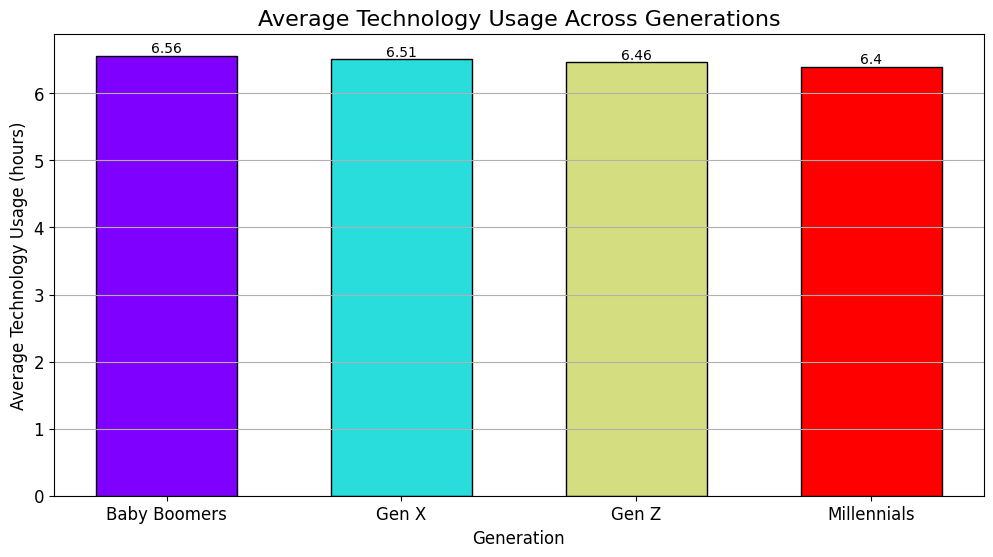

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Generate a rainbow color scheme using matplotlib's 'rainbow' colormap
colors_tech = plt.cm.rainbow(np.linspace(0, 1, len(grouped_data['Generation'])))
colors_stress = plt.cm.rainbow(np.linspace(0, 1, len(grouped_data['Generation'])))

# Bar chart for average technology usage across generations
plt.figure(figsize=(12, 6))
bars = plt.bar(grouped_data['Generation'], grouped_data['avg_tech_usage'], color=colors_tech, edgecolor='black', width=0.6)
plt.title('Average Technology Usage Across Generations', fontsize=16)
plt.xlabel('Generation', fontsize=12)
plt.ylabel('Average Technology Usage (hours)', fontsize=12)
plt.grid(True, axis='y')

# Add data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', fontsize=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()




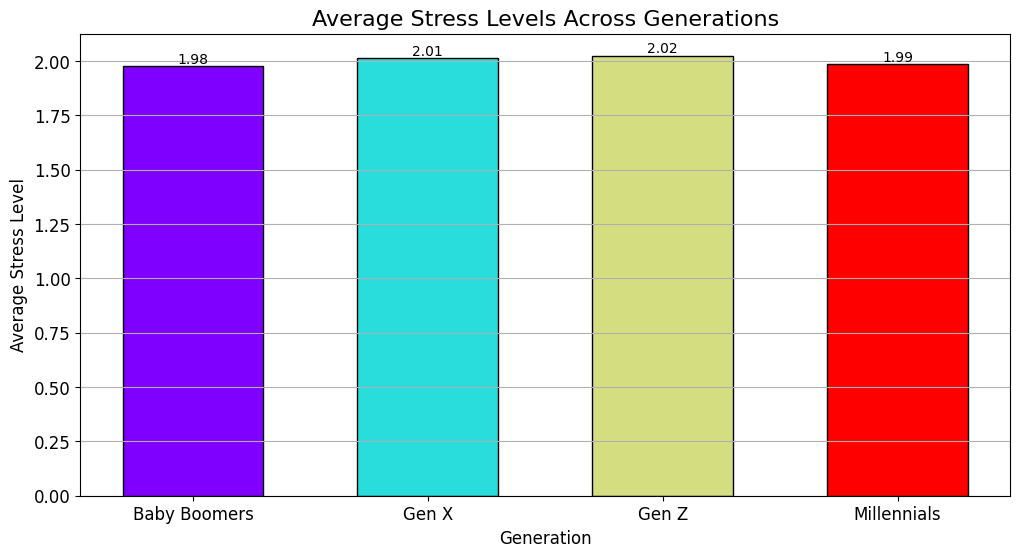

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [32]:
# Bar chart for average stress levels across generations
plt.figure(figsize=(12, 6))
bars = plt.bar(grouped_data['Generation'], grouped_data['avg_stress_level'], color=colors_stress, edgecolor='black', width=0.6)
plt.title('Average Stress Levels Across Generations', fontsize=16)
plt.xlabel('Generation', fontsize=12)
plt.ylabel('Average Stress Level', fontsize=12)
plt.grid(True, axis='y')

# Add data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', fontsize=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
plt.savefig('stress_levels_chart.png') # Save the chart as a PNG image
files.download('stress_levels_chart.png') # Download the saved image

In [31]:
# ... (your chart code) ...



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>